# IMPUTACIÓN DE DATOS EN NOTAS CREDITO.XLSX


In [21]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt



In [22]:
# Cargamos el datafreame
df = pd.read_excel('notas_credito.xlsx')
df.head(10)

,Unnamed: 0,TIP_DOC,CVE_DOC,CVE_CLPV,STATUS,CVE_VEND,CVE_PEDI,FECHA_DOC,FECHA_ENTREGA,FECHA_VEN,FECHA_CANCELA,CANTD_TOT,FECHA_ELAB,RFC,SERIE,FOLIO
0,0,E,NC00247,6826,C,2.0,NaN,2019-09-10,2019-09-10,2019-09-10,2019-09-13,603.4480,2019-09-10 11:49:34,DEQJ760331UC0,NC,247
1,1,E,NC00248,5437,E,2.0,NaN,2019-09-11,2019-09-11,2019-09-11,NaT,431.0344,2019-09-11 08:54:14,OIM 060801 GH5,NC,248
2,2,E,NC00249,1240,C,2.0,NaN,2019-09-11,2019-09-11,2019-09-11,2019-09-18,4135.0000,2019-09-11 18:23:06,REMA-710901-G64,NC,249
3,3,E,NC00250,4889,E,3.0,NaN,2019-09-12,2019-09-12,2019-09-12,NaT,258.6200,2019-09-12 14:54:54,MAPA 710520 A10,NC,250
4,4,E,NC00251,6834,E,2.0,F29452,2019-09-19,2019-09-10,2019-09-19,NaT,919.4560,2019-09-19 10:59:28,NPR111214391,NC,251
5,5,E,NC00252,5926,E,2.0,F29447/ANT-5041,2019-09-19,2019-09-10,2019-09-19,NaT,852.2670,2019-09-19 11:49:58,XAXX 010101 000,NC,252
6,6,E,NC00253,6833,E,2.0,F29448,2019-09-23,2019-09-10,2019-09-23,NaT,517.2410,2019-09-23 12:47:06,GAGK7507221E4,NC,253
7,7,E,NC00254,6844,E,2.0,F29566,2019-09-27,2019-09-27,2019-09-27,NaT,43103.4482,2019-09-27 17:16:46,TAS081127HU5,NC,254
8,8,E,NC00255,6278,E,2.0,F29445,2019-10-02,2019-09-09,2019-10-02,NaT,258.6200,2019-10-02 12:51:37,MBA 161102 2D2,NC,255
9,9,E,NC00256,5926,E,2.0,F29724,2019-10-02,2019-10-02,2019-10-02,NaT,623.7500,2019-10-02 18:25:54,XAXX 010101 000,NC,256


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     515 non-null    int64         
 1   TIP_DOC        515 non-null    object        
 2   CVE_DOC        515 non-null    object        
 3   CVE_CLPV       515 non-null    int64         
 4   STATUS         515 non-null    object        
 5   CVE_VEND       505 non-null    float64       
 6   CVE_PEDI       504 non-null    object        
 7   FECHA_DOC      515 non-null    datetime64[ns]
 8   FECHA_ENTREGA  515 non-null    datetime64[ns]
 9   FECHA_VEN      515 non-null    datetime64[ns]
 10  FECHA_CANCELA  18 non-null     datetime64[ns]
 11  CANTD_TOT      515 non-null    float64       
 12  FECHA_ELAB     515 non-null    datetime64[ns]
 13  RFC            515 non-null    object        
 14  SERIE          515 non-null    object        
 15  FOLIO          515 non-

<Axes: >

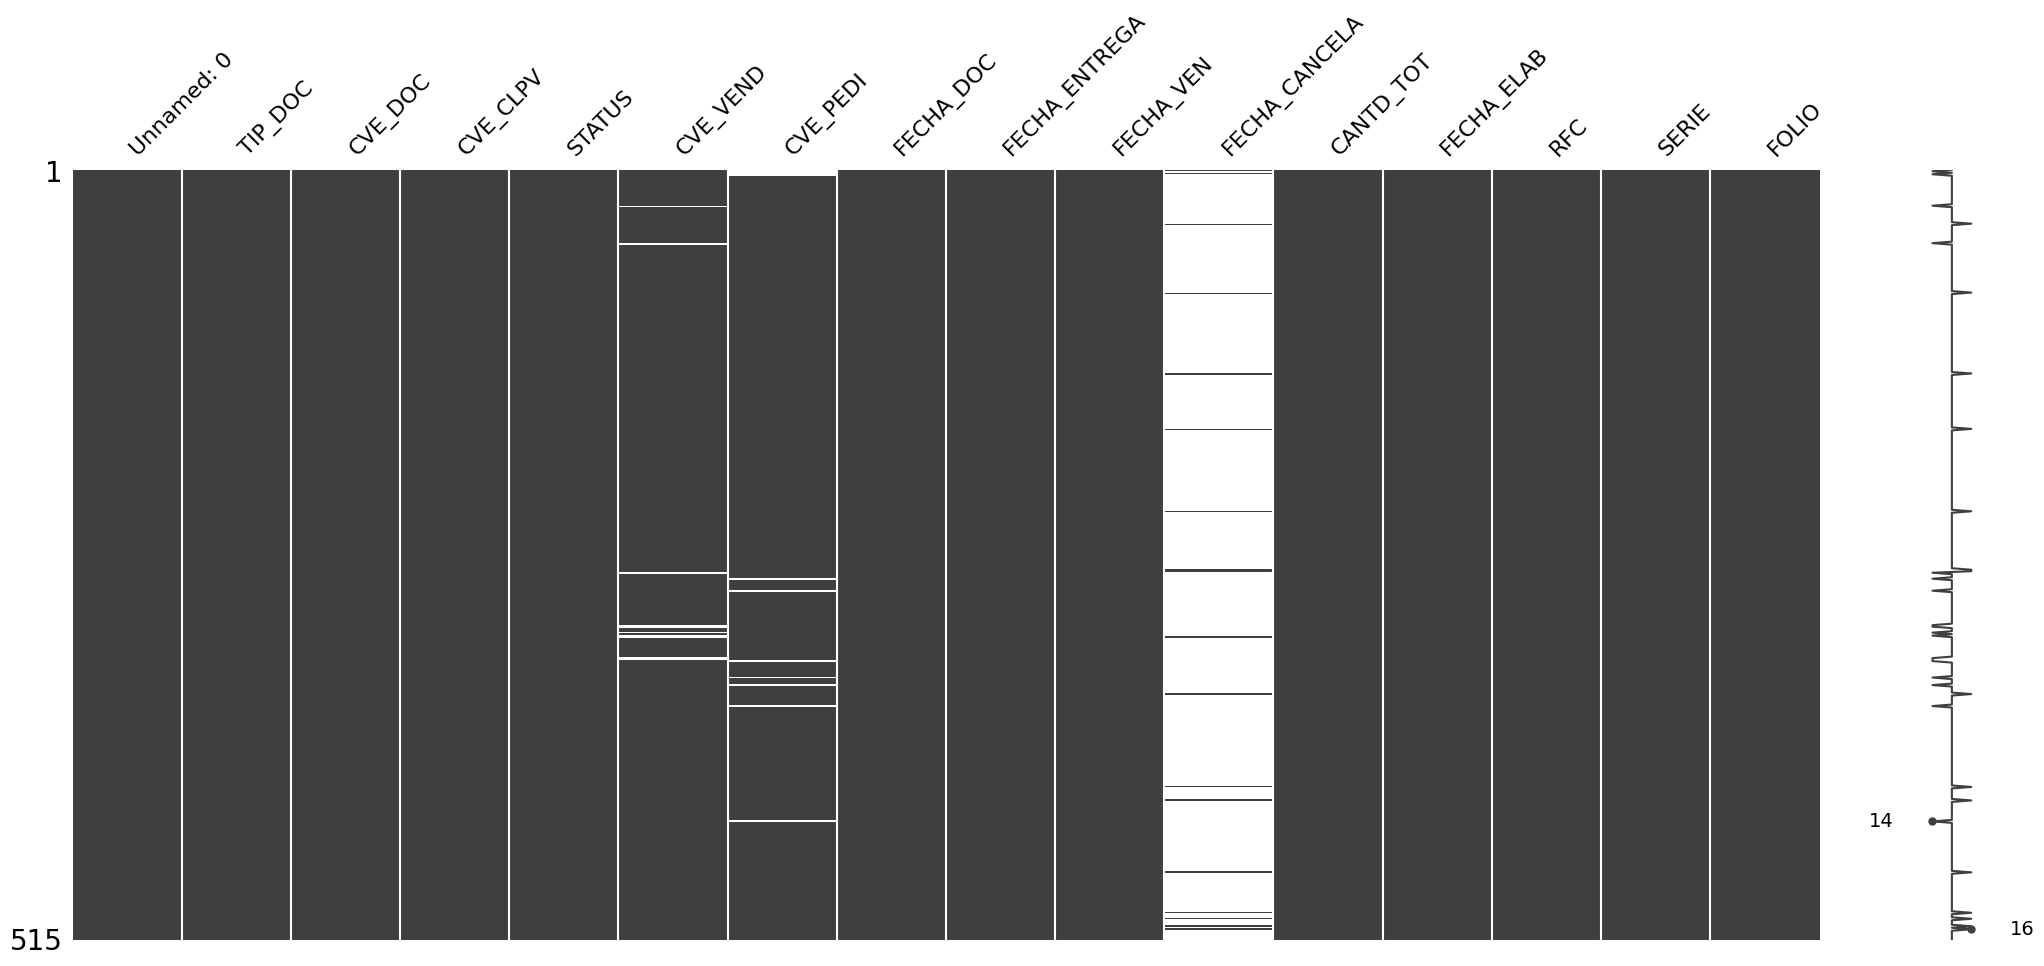

In [24]:
#identificamos los valores nulos
msno.matrix(df)

In [25]:
#Cuanttficamos los valores nulos
df.isnull().sum()

Unnamed: 0         0
TIP_DOC            0
CVE_DOC            0
CVE_CLPV           0
STATUS             0
CVE_VEND          10
CVE_PEDI          11
FECHA_DOC          0
FECHA_ENTREGA      0
FECHA_VEN          0
FECHA_CANCELA    497
CANTD_TOT          0
FECHA_ELAB         0
RFC                0
SERIE              0
FOLIO              0
dtype: int64

En la columna CVE_VEND se le imuputará la mediana ya que al ser un dato flotante se le puede hacer una tecnica un poco menos agresiva con outliers



In [26]:
#imputamos la mediana de la columna CVE_VEND a los valores nulos
df['CVE_VEND'] = df['CVE_VEND'].fillna(df['CVE_VEND'].median())

Se decide imputar una fecha cero, que significa que es que no hubo devolución y no generar conflicto de tipo de dato


In [27]:
#imputamos una fecha fija a los valores nulos de la columna FECHA_CANCELA
df['FECHA_CANCELA'] = df['FECHA_CANCELA'].fillna('0000-01-01')


Se imputa un "no disponible" en la columna CVE_PEDI y CVE_VEND ya que no es posible acceder a esa información en este momento


In [28]:
#Se imputa 'no disponible' en la columna CVE_PEDI a los valores nulos
df['CVE_PEDI'] = df['CVE_PEDI'].fillna('no disponible')


In [29]:
#Se imputa 'no disponible' en la columna CVE_VEND a los valores nulos
df['CVE_VEND'] = df['CVE_VEND'].fillna('no disponible')


In [30]:
#Verificamos que ya no hay valores nulos
df.isnull().sum()

Unnamed: 0       0
TIP_DOC          0
CVE_DOC          0
CVE_CLPV         0
STATUS           0
CVE_VEND         0
CVE_PEDI         0
FECHA_DOC        0
FECHA_ENTREGA    0
FECHA_VEN        0
FECHA_CANCELA    0
CANTD_TOT        0
FECHA_ELAB       0
RFC              0
SERIE            0
FOLIO            0
dtype: int64

<Axes: >

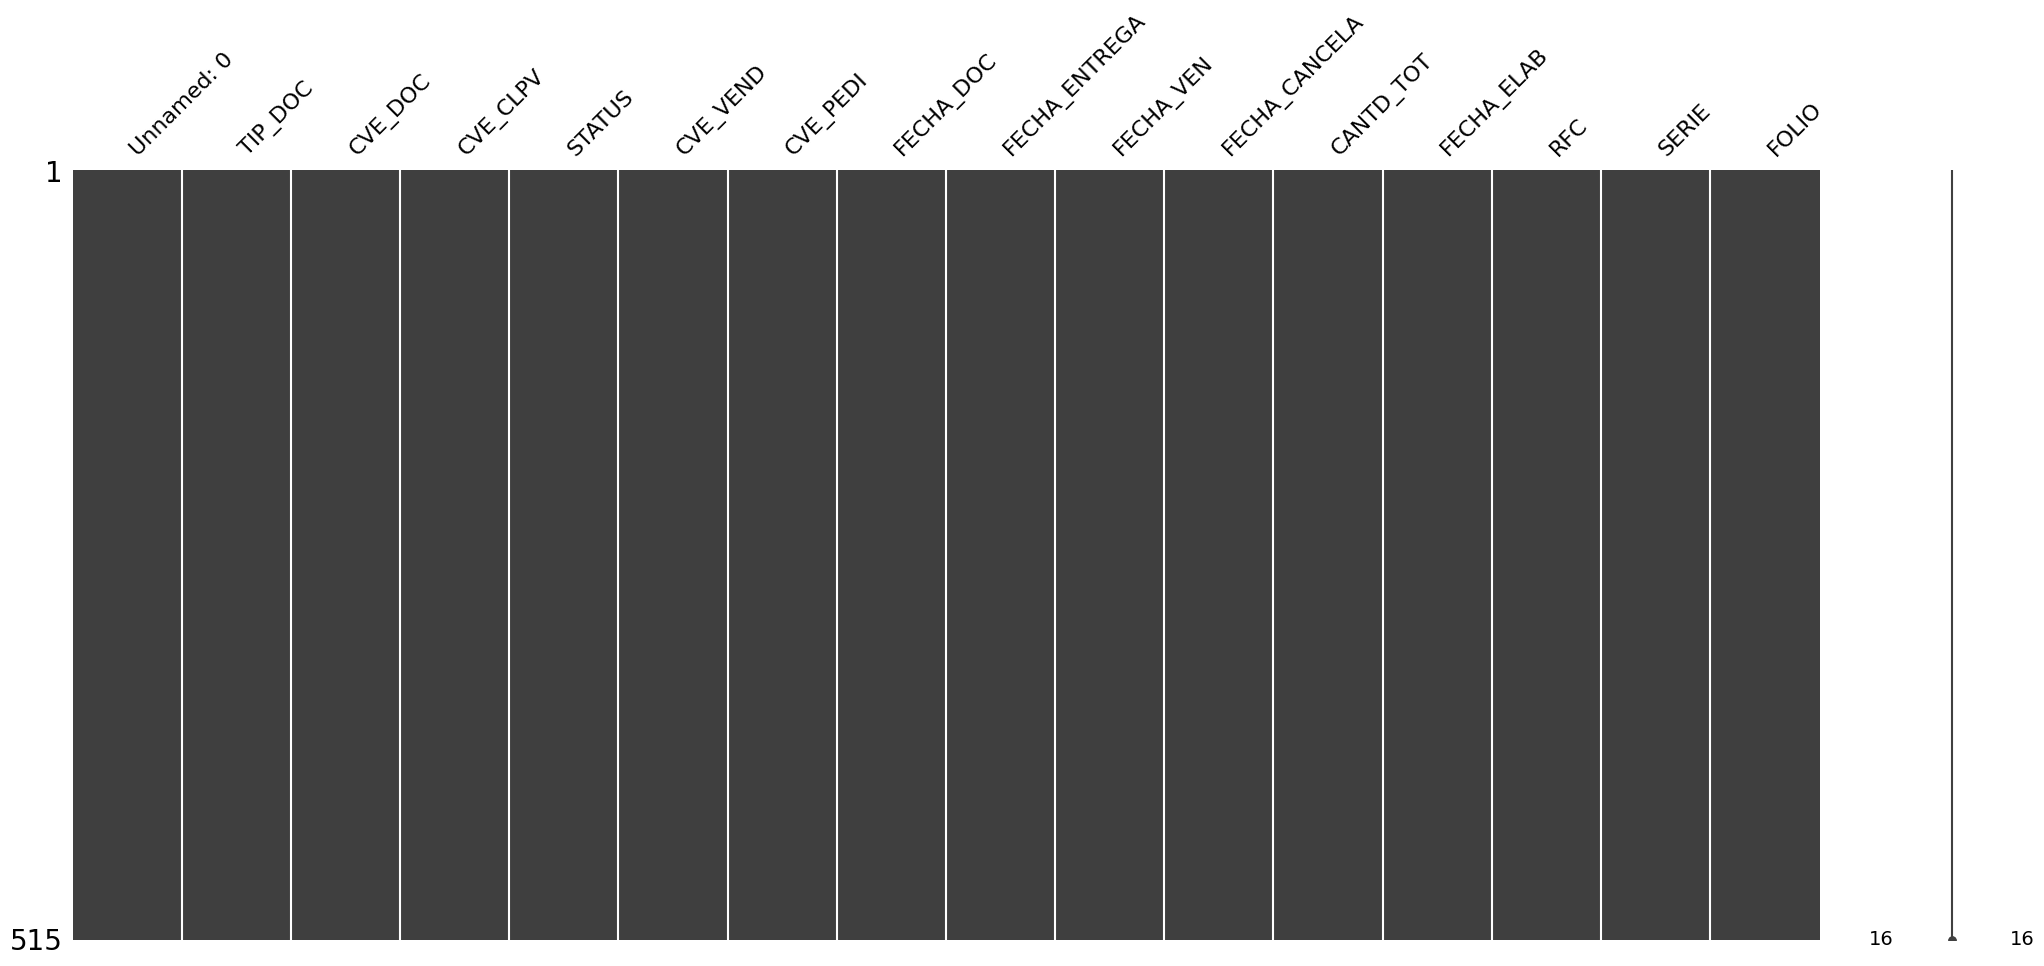

In [31]:
#visualizamos los datos imputados
msno.matrix(df)

In [33]:
#Exportamos el dataframe limpio en scv
df.to_csv('notascredito_limpio.csv', index=False)
